In [ ]:
import import_ipynb
%run 03-EDA.ipynb

### Imports

In [29]:
import math
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer


import statsmodels.api as sm

<a id="11"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">11. | Model Development: PIMA Data: Logistic Regression</div>

### Selected Features

In [30]:
selected_features_cdc_data = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cdc_data = pima_data

<a id="11.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">11.1 | Model Development: PIMA Data: Logistic Regression: First Iteration</div>

### Split Features and Target

In [44]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Outcome']

### Split Train and Test Dataset

In [32]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


#### Train with Logistic Regression

In [33]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

#### Predict using Logistic Regression

In [34]:

predictions_train_lr = model_lr.predict(X_train)
predictions_test_lr  = model_lr.predict(X_test)

#### LR: Significant Variables

In [35]:
# Coefficients from scikit-learn
print("Coefficients from scikit-learn:")
print(model_lr.coef_)

# Using statsmodels to get p-values and more detailed summary
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Coefficients from scikit-learn:
[[ 0.06650563  0.03397044 -0.01388656  0.00420165 -0.00183393  0.10144834
   0.621594    0.03482498]]
Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.2752
Time:                        01:58:13   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

#### Coefficients and Interpretation:
 
Coefficients:
Positive Coefficients: Indicate that as the predictor increases, the log odds of the target (Outcome) being 1 (i.e., having diabetes) also increases.

Negative Coefficients: Indicate that as the predictor increases, the log odds of the target being 1 decreases.

Significant Predictors:

All predictors have a p-value (P>|z|) less than 0.05, indicating they are statistically significant.

Key Predictors:

HighBP (0.7865): Having high blood pressure is strongly associated with increased odds of diabetes, as indicated by the high positive coefficient.
HighChol (0.5925): High cholesterol is also associated with increased odds of diabetes.
GenHlth (0.5602): Poor general health significantly increases the odds of diabetes.
Age (0.1312): Older age is associated with higher odds of diabetes.
DiffWalk (0.1471): Difficulty walking is positively associated with diabetes.

Negative Predictors:

PhysActivity (-0.0356): Physical activity slightly reduces the odds of diabetes.
MentHlth (-0.0052): Better mental health reduces the odds, though the effect is small.
PhysHlth (-0.0067): Better physical health reduces the odds of diabetes.
Education (-0.0337): Higher education levels are associated with reduced odds of diabetes.
Income (-0.0433): Higher income levels are also associated with reduced odds of diabetes.
 
Model Statistics:
 
Log-Likelihood (-65745):
The log-likelihood value is used to assess model fit; higher values (closer to zero) indicate a better fit.

Pseudo R-squared (0.1989):
Indicates the proportion of variance explained by the model. While not directly comparable to R-squared in linear regression, a higher value suggests better explanatory power.

LLR p-value (0.000):
Indicates that the model is statistically significant overall.

Convergence:
The output indicates that the model converged successfully, meaning the optimization process found a solution.
 
Confidence Intervals:
 
Confidence Intervals:

Provide a range within which the true coefficient is expected to fall with 95% confidence.
For example, the coefficient for HighBP (0.7865) has a 95% confidence interval of [0.755, 0.819], indicating that the effect is consistently positive.
 
Overall Interpretation:
 
Influential Factors: High blood pressure, high cholesterol, poor general health, and age are significant predictors of diabetes risk, with high blood pressure having the strongest association.

Protective Factors: Physical activity, mental health, education, and income appear to be protective factors, reducing the risk of diabetes.

Model Fit: The model is statistically significant and explains a substantial portion of the variance in the outcome, as indicated by the pseudo R-squared.

#### Plot Confusion Matrix For Logistic Regression

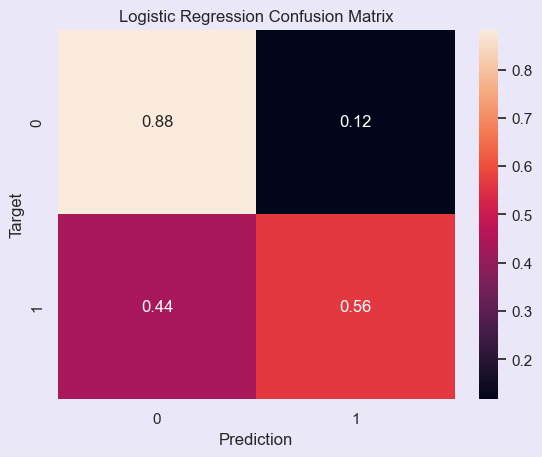

In [36]:
cf_lr = confusion_matrix(y_train, predictions_train_lr, normalize='true')
plt.figure()
sns.heatmap(cf_lr, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Logistic Regression"))
plt.show()

#### Calculate Evaluation Metrics for Logistic Regression

In [37]:
# Training set performance
lr_train_accuracy = accuracy_score(y_train, predictions_train_lr) # Calculate Accuracy
lr_train_f1 = f1_score(y_train, predictions_train_lr) # Calculate F1-score
lr_train_precision = precision_score(y_train, predictions_train_lr) # Calculate Precision
lr_train_recall = recall_score(y_train, predictions_train_lr) # Calculate Recall
lr_train_rocauc_score = roc_auc_score(y_train, predictions_train_lr)
lr_train_log_loss_value = log_loss(y_train, predictions_train_lr)


# Test set performance
lr_test_accuracy = accuracy_score(y_test, predictions_test_lr) # Calculate Accuracy
lr_test_f1 = f1_score(y_test, predictions_test_lr) # Calculate F1-score
lr_test_precision = precision_score(y_test, predictions_test_lr) # Calculate Precision
lr_test_recall = recall_score(y_test, predictions_test_lr) # Calculate Recall
lr_test_rocauc_score = roc_auc_score(y_test, predictions_test_lr) #Calculate Roc
lr_test_log_loss_value = log_loss(y_test, predictions_test_lr)

print('LR: Model performance for Training set')
print("- Accuracy: {:.4f}".format(lr_train_accuracy))
print('- F1 score: {:.4f}'.format(lr_train_f1))
print('- Precision: {:.4f}'.format(lr_train_precision))
print('- Recall: {:.4f}'.format(lr_train_recall))
print('- Roc Auc Score: {:.4f}'.format(lr_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(lr_train_log_loss_value))

    
    
print('----------------------------------')
    
print('LR: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(lr_test_accuracy))
print('- F1 score: {:.4f}'.format(lr_test_f1))
print('- Precision: {:.4f}'.format(lr_test_precision))
print('- Recall: {:.4f}'.format(lr_test_recall))
print('- Roc Auc Score: {:.4f}'.format(lr_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(lr_test_log_loss_value))

    
print('='*35)
print('\n')

LR: Model performance for Training set
- Accuracy: 0.7720
- F1 score: 0.6316
- Precision: 0.7186
- Recall: 0.5634
- Roc Auc Score: 0.7231
- Log Loss: 8.2184
----------------------------------
LR: Model performance for Test set
- Accuracy: 0.7468
- F1 score: 0.6549
- Precision: 0.6379
- Recall: 0.6727
- Roc Auc Score: 0.7303
- Log Loss: 9.1279




#### LR: MSE and RMSE


In [38]:
mse_lr = mean_squared_error(y_test,predictions_test_lr)
print('mse_lr:'+str(mse_lr))
rmse_lr = math.sqrt(mean_squared_error(y_test,predictions_test_lr))
print('rmse_lr:'+str(rmse_lr))

mse_lr:0.2532467532467532
rmse_lr:0.5032362797401965


#### LR: Classification Report


In [39]:
cm_lr_train = classification_report(y_train,predictions_train_lr)

print('Logistic Regression Model: Train\n')
print(cm_lr_train)

cm_lr_test = classification_report(y_test,predictions_test_lr)

print('Logistic Regression Model: Test\n')
print(cm_lr_test)

Logistic Regression Model: Train

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       401
           1       0.72      0.56      0.63       213

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614

Logistic Regression Model: Test

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



#### LR: N-fold cross-validation

In [40]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Outcome']

model_lr = LogisticRegression()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = model_lr.predict(X_train_kfold)
    pred_test_lr_kfold = model_lr.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_lr_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_lr_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_lr_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_lr_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_lr_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_lr_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_pima_lr_iter1 = np.mean(training_accuracies)
std_train_accuracy_pima_lr_iter1 = np.std(training_accuracies)
mean_test_accuracy_pima_lr_iter1 = np.mean(testing_accuracies)
std_test_accuracy_pima_lr_iter1 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_pima_lr_iter1:.2f} ± {std_train_accuracy_pima_lr_iter1:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_pima_lr_iter1:.2f} ± {std_test_accuracy_pima_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_pima_lr_iter1 = np.mean(training_f1)
std_train_f1_pima_lr_iter1 = np.std(training_f1)
mean_test_f1_pima_lr_iter1 = np.mean(testing_f1)
std_test_f1_pima_lr_iter1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_pima_lr_iter1:.2f} ± {std_train_f1_pima_lr_iter1:.2f}")
print(f"Test F1: {mean_test_f1_pima_lr_iter1:.2f} ± {std_test_f1_pima_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_pima_lr_iter1 = np.mean(training_precision)
std_train_precision_pima_lr_iter1 = np.std(training_precision)
mean_test_precision_pima_lr_iter1 = np.mean(testing_precision)
std_test_precision_pima_lr_iter1 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_pima_lr_iter1:.2f} ± {std_train_precision_pima_lr_iter1:.2f}")
print(f"Test Precision: {mean_test_precision_pima_lr_iter1:.2f} ± {std_test_precision_pima_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_pima_lr_iter1 = np.mean(training_recall)
std_train_recall_pima_lr_iter1 = np.std(training_recall)
mean_test_recall_pima_lr_iter1 = np.mean(testing_recall)
std_test_recall_pima_lr_iter1 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_pima_lr_iter1:.2f} ± {std_train_recall_pima_lr_iter1:.2f}")
print(f"Test Recall: {mean_test_recall_pima_lr_iter1:.2f} ± {std_test_recall_pima_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_pima_lr_iter1 = np.mean(training_rocauc_score)
std_train_rocauc_score_pima_lr_iter1 = np.std(training_rocauc_score)
mean_test_rocauc_score_pima_lr_iter1 = np.mean(testing_rocauc_score)
std_test_rocauc_score_pima_lr_iter1 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_pima_lr_iter1:.2f} ± {std_train_rocauc_score_pima_lr_iter1:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_pima_lr_iter1:.2f} ± {std_test_rocauc_score_pima_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value_pima_lr_iter1 = np.mean(training_log_loss_value)
std_train_log_loss_value_pima_lr_iter1 = np.std(training_log_loss_value)
mean_test_log_loss_value_pima_lr_iter1 = np.mean(testing_log_loss_value)
std_test_log_loss_value_pima_lr_iter1 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_pima_lr_iter1:.2f} ± {std_train_log_loss_value_pima_lr_iter1:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_pima_lr_iter1:.2f} ± {std_test_log_loss_value_pima_lr_iter1:.2f}")
print("="*50)





Training Accuracy: 0.78 ± 0.01
Test Accuracy: 0.78 ± 0.01


Training F1: 0.64 ± 0.01
Test F1: 0.64 ± 0.02


Training Precision: 0.73 ± 0.01
Test Precision: 0.74 ± 0.03


Training Recall: 0.58 ± 0.01
Test Recall: 0.57 ± 0.04


Training RO-AUC: 0.73 ± 0.01
Test RO-AUC: 0.73 ± 0.01


Training Log Loss: 8.00 ± 0.23
Test Log Loss: 7.98 ± 0.27


<a id="11.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">11.1 | Model Development: PIMA Data: Logistic Regression: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>
Accuracy - 78% <br>
F1 Score - 0.64 <br>
RO-AUC   - 0.73 <br>
Log Loss - 8.03 <br>

<b>Overall Conclusions:</b>
 
Class Imbalance: The disparity between high accuracy and low F1 score, recall, and RO-AUC suggests class imbalance. 
The model is likely biased towards predicting the majority class.

Model Calibration and Discrimination: 
The high Log Loss and low RO-AUC indicate that the model's probability estimates are poorly calibrated and 
it struggles to discriminate between classes.

<b>Need for Improvement: </b>

Focus on improving recall and F1 score by:
Addressing class imbalance through techniques like oversampling the minority class, 

undersampling the majority class, 

or using synthetic data generation (e.g., SMOTE).

Exploring different algorithms or hyperparameters that might better capture the minority class.

Evaluating additional metrics such as the confusion matrix to identify where the model is making errors.

</div>



<a id="11.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">11.2 | Model Development: PIMA Data: Logistic Regression: Second Iteration</div>

Model shows overall good performance.

It can be improved by resolving the class imbalance and hyper parameter tuning.

To put through the optimizations with these enhancements

In [46]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize Logistic Regression model with class weight balancing
model_lr = LogisticRegression(class_weight='balanced', random_state=42)

# SMOTE for balancing the classes
smote = SMOTE(random_state=42)

# Arrays to store metrics
training_accuracies, testing_accuracies = [], []
training_f1, testing_f1 = [], []
training_precision, testing_precision = [], []
training_recall, testing_recall = [], []
training_rocauc_score, testing_rocauc_score = [], []
training_log_loss_value, testing_log_loss_value = [], []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = model_lr.predict(X_train_kfold)
    pred_test_lr_kfold = model_lr.predict(X_test_kfold)

    # Calculate and store metrics
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_lr_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_lr_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_lr_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_lr_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_lr_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_lr_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_lr_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_lr_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, pred_train_lr_kfold))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, pred_test_lr_kfold))
    training_log_loss_value.append(log_loss(y_train_kfold, pred_train_lr_kfold))
    testing_log_loss_value.append(log_loss(y_test_kfold, pred_test_lr_kfold))

    

# Calculate mean and standard deviation of accuracies
mean_train_accuracy_pima_lr_iter2 = np.mean(training_accuracies)
std_train_accuracy_pima_lr_iter2 = np.std(training_accuracies)
mean_test_accuracy_pima_lr_iter2 = np.mean(testing_accuracies)
std_test_accuracy_pima_lr_iter2 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_pima_lr_iter2:.2f} ± {std_train_accuracy_pima_lr_iter2:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_pima_lr_iter2:.2f} ± {std_test_accuracy_pima_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_pima_lr_iter2 = np.mean(training_f1)
std_train_f1_pima_lr_iter2 = np.std(training_f1)
mean_test_f1_pima_lr_iter2 = np.mean(testing_f1)
std_test_f1_pima_lr_iter2 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_pima_lr_iter2:.2f} ± {std_train_f1_pima_lr_iter2:.2f}")
print(f"Test F1: {mean_test_f1_pima_lr_iter2:.2f} ± {std_test_f1_pima_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_pima_lr_iter2 = np.mean(training_precision)
std_train_precision_pima_lr_iter2 = np.std(training_precision)
mean_test_precision_pima_lr_iter2 = np.mean(testing_precision)
std_test_precision_pima_lr_iter2 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_pima_lr_iter2:.2f} ± {std_train_precision_pima_lr_iter2:.2f}")
print(f"Test Precision: {mean_test_precision_pima_lr_iter2:.2f} ± {std_test_precision_pima_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_pima_lr_iter2 = np.mean(training_recall)
std_train_recall_pima_lr_iter2 = np.std(training_recall)
mean_test_recall_pima_lr_iter2 = np.mean(testing_recall)
std_test_recall_pima_lr_iter2 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_pima_lr_iter2:.2f} ± {std_train_recall_pima_lr_iter2:.2f}")
print(f"Test Recall: {mean_test_recall_pima_lr_iter2:.2f} ± {std_test_recall_pima_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_pima_lr_iter2 = np.mean(training_rocauc_score)
std_train_rocauc_score_pima_lr_iter2 = np.std(training_rocauc_score)
mean_test_rocauc_score_pima_lr_iter2 = np.mean(testing_rocauc_score)
std_test_rocauc_score_pima_lr_iter2 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_pima_lr_iter2:.2f} ± {std_train_rocauc_score_pima_lr_iter2:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_pima_lr_iter2:.2f} ± {std_test_rocauc_score_pima_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value_pima_lr_iter2 = np.mean(training_log_loss_value)
std_train_log_loss_value_pima_lr_iter2 = np.std(training_log_loss_value)
mean_test_log_loss_value_pima_lr_iter2 = np.mean(testing_log_loss_value)
std_test_log_loss_value_pima_lr_iter2 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_pima_lr_iter2:.2f} ± {std_train_log_loss_value_pima_lr_iter2:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_pima_lr_iter2:.2f} ± {std_test_log_loss_value_pima_lr_iter2:.2f}")
print("="*50)



Training Accuracy: 0.76 ± 0.01
Test Accuracy: 0.74 ± 0.04


Training F1: 0.75 ± 0.01
Test F1: 0.66 ± 0.04


Training Precision: 0.77 ± 0.01
Test Precision: 0.62 ± 0.07


Training Recall: 0.74 ± 0.01
Test Recall: 0.71 ± 0.03


Training RO-AUC: 0.76 ± 0.01
Test RO-AUC: 0.73 ± 0.03


Training Log Loss: 8.68 ± 0.34
Test Log Loss: 9.39 ± 1.58


<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

Accuracy:
Training Accuracy: 0.76 ± 0.01
Test Accuracy: 0.74 ± 0.04

The model exhibits relatively balanced accuracy between training and test datasets, indicating good generalization capabilities.

F1 Score:
Training F1: 0.75 ± 0.01
Test F1: 0.66 ± 0.04

The F1 score shows a moderate drop on the test set, suggesting some challenges in maintaining the balance between precision and recall on unseen data.

Precision:
Training Precision: 0.77 ± 0.01
Test Precision: 0.62 ± 0.07

Precision drops on the test set, indicating an increased number of false positives. This suggests a need for improving the model's ability to correctly identify negative cases.

Recall:
Training Recall: 0.74 ± 0.01
Test Recall: 0.71 ± 0.03

The recall remains relatively stable between training and test sets, indicating the model's consistent ability to capture actual positive cases.

ROC AUC:
Training RO-AUC: 0.76 ± 0.01
Test RO-AUC: 0.73 ± 0.03

The ROC AUC scores suggest moderate class discrimination capabilities, with a slight decrease on the test set.

Log Loss:
Training Log Loss: 8.68 ± 0.34
Test Log Loss: 9.39 ± 1.58

The high log loss values indicate that the model's probability estimates are not well-calibrated, with greater uncertainty on the test set.

<b>Overall Conclusions:</b>

The model demonstrates balanced accuracy and recall, indicating its ability to generalize well to unseen data. However, the drop in precision and high log loss highlight challenges in probability calibration and false positive reduction.

<b>Recommendations for Improvement:</b>

To enhance precision and probability calibration, consider adjusting the decision threshold and exploring additional feature engineering. 
</div>

In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Define the parameter grid
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l2'],  # L1 can be used with 'liblinear' or 'saga'
    'logisticregression__solver': ['liblinear', 'saga']
}

# Create a pipeline with SMOTE and Logistic Regression
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('logisticregression', LogisticRegression(class_weight='balanced', random_state=42, max_iter=500))
])

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=make_scorer(f1_score), cv=cv, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator for evaluation
best_model = grid_search.best_estimator_

# Perform cross-validation again using the best model for detailed metrics
for train_index, test_index in cv.split(X, y):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Resample the training data with SMOTE
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the best model
    best_model.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = best_model.predict(X_train_kfold)
    pred_test_lr_kfold = best_model.predict(X_test_kfold)
    
    # Calculate and store metrics
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_lr_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_lr_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_lr_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_lr_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_lr_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_lr_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_lr_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_lr_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, pred_train_lr_kfold))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, pred_test_lr_kfold))
    training_log_loss_value.append(log_loss(y_train_kfold, pred_train_lr_kfold))
    testing_log_loss_value.append(log_loss(y_test_kfold, pred_test_lr_kfold))


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_pima_lr_iter3 = np.mean(training_accuracies)
std_train_accuracy_pima_lr_iter3 = np.std(training_accuracies)
mean_test_accuracy_pima_lr_iter3 = np.mean(testing_accuracies)
std_test_accuracy_pima_lr_iter3 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_pima_lr_iter3:.2f} ± {std_train_accuracy_pima_lr_iter3:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_pima_lr_iter3:.2f} ± {std_test_accuracy_pima_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_pima_lr_iter3 = np.mean(training_f1)
std_train_f1_pima_lr_iter3 = np.std(training_f1)
mean_test_f1_pima_lr_iter3 = np.mean(testing_f1)
std_test_f1_pima_lr_iter3 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_pima_lr_iter3:.2f} ± {std_train_f1_pima_lr_iter3:.2f}")
print(f"Test F1: {mean_test_f1_pima_lr_iter3:.2f} ± {std_test_f1_pima_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_pima_lr_iter3 = np.mean(training_precision)
std_train_precision_pima_lr_iter3 = np.std(training_precision)
mean_test_precision_pima_lr_iter3 = np.mean(testing_precision)
std_test_precision_pima_lr_iter3 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_pima_lr_iter3:.2f} ± {std_train_precision_pima_lr_iter3:.2f}")
print(f"Test Precision: {mean_test_precision_pima_lr_iter3:.2f} ± {std_test_precision_pima_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_pima_lr_iter3 = np.mean(training_recall)
std_train_recall_pima_lr_iter3 = np.std(training_recall)
mean_test_recall_pima_lr_iter3 = np.mean(testing_recall)
std_test_recall_pima_lr_iter3 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_pima_lr_iter3:.2f} ± {std_train_recall_pima_lr_iter3:.2f}")
print(f"Test Recall: {mean_test_recall_pima_lr_iter3:.2f} ± {std_test_recall_pima_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_pima_lr_iter3 = np.mean(training_rocauc_score)
std_train_rocauc_score_pima_lr_iter3 = np.std(training_rocauc_score)
mean_test_rocauc_score_pima_lr_iter3 = np.mean(testing_rocauc_score)
std_test_rocauc_score_pima_lr_iter3 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_pima_lr_iter3:.2f} ± {std_train_rocauc_score_pima_lr_iter3:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_pima_lr_iter3:.2f} ± {std_test_rocauc_score_pima_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value_pima_lr_iter3 = np.mean(training_log_loss_value)
std_train_log_loss_value_pima_lr_iter3 = np.std(training_log_loss_value)
mean_test_log_loss_value_pima_lr_iter3 = np.mean(testing_log_loss_value)
std_test_log_loss_value_pima_lr_iter3 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_pima_lr_iter3:.2f} ± {std_train_log_loss_value_pima_lr_iter3:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_pima_lr_iter3:.2f} ± {std_test_log_loss_value_pima_lr_iter3:.2f}")
print("="*50)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.01, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__pena

/Users/maljayac/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maljayac/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maljayac/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maljayac/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maljayac/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/maljayac/Library/P

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

Accuracy:
Training Accuracy: 0.76 ± 0.01
Test Accuracy: 0.75 ± 0.04

The model demonstrates consistent accuracy between training and test datasets, indicating solid generalization capabilities.

F1 Score:
Training F1: 0.76 ± 0.01
Test F1: 0.67 ± 0.04

The F1 score shows a moderate decrease on the test set, suggesting some challenges in balancing precision and recall on unseen data.

Precision:
Training Precision: 0.77 ± 0.01
Test Precision: 0.63 ± 0.07

Precision drops on the test set, indicating a number of false positives. This suggests room for improvement in accurately identifying negative cases.

Recall:
Training Recall: 0.74 ± 0.01
Test Recall: 0.72 ± 0.03

The recall remains relatively stable between training and test sets, showing the model's consistent ability to capture actual positive cases.

ROC AUC:
Training RO-AUC: 0.76 ± 0.01
Test RO-AUC: 0.74 ± 0.03

The ROC AUC scores suggest moderate class discrimination capabilities, with a slight decrease on the test set.

Log Loss:
Training Log Loss: 8.62 ± 0.31
Test Log Loss: 8.97 ± 1.51

The high log loss values indicate that the model's probability estimates are not well-calibrated, with greater uncertainty on the test set.

<b>Overall Conclusions:</b>

The model exhibits balanced accuracy and recall, indicating its ability to generalize well to unseen data. However, the decrease in precision and high log loss highlight challenges in probability calibration and false positive reduction.

<b>Recommendations for Improvement:</b>

To enhance precision and probability calibration, consider adjusting the decision threshold and exploring additional feature engineering. Techniques like SMOTE or class weight adjustments could further improve class balance and model performance.

</div>

In [50]:
# Print training set performance metrics
print('Training set performance metrics:')
print(f"Accuracy: {lr_train_accuracy:.4f}")
print(f"F1 Score: {lr_train_f1:.4f}")
print(f"Precision: {lr_train_precision:.4f}")
print(f"Recall: {lr_train_recall:.4f}")
print(f"ROC AUC Score: {lr_train_rocauc_score:.4f}")
print(f"Log Loss: {lr_train_log_loss_value:.4f}")

# Print test set performance metrics
print('\nTest set performance metrics:')
print(f"Accuracy: {lr_test_accuracy:.4f}")
print(f"F1 Score: {lr_test_f1:.4f}")
print(f"Precision: {lr_test_precision:.4f}")
print(f"Recall: {lr_test_recall:.4f}")
print(f"ROC AUC Score: {lr_test_rocauc_score:.4f}")
print(f"Log Loss: {lr_test_log_loss_value:.4f}")

# Print cross-validation performance metrics
print('\nCross-validation performance metrics:')
print(f"Mean Training Accuracy: {mean_train_accuracy_pima_lr_iter3:.4f} ± {std_train_accuracy_pima_lr_iter3:.4f}")
print(f"Mean Test Accuracy: {mean_test_accuracy_pima_lr_iter3:.4f} ± {std_test_accuracy_pima_lr_iter3:.4f}")
print(f"Mean Training F1: {mean_train_f1_pima_lr_iter3:.4f} ± {std_train_f1_pima_lr_iter3:.4f}")
print(f"Mean Test F1: {mean_test_f1_pima_lr_iter3:.4f} ± {std_test_f1_pima_lr_iter3:.4f}")
print(f"Mean Training Precision: {mean_train_precision_pima_lr_iter3:.4f} ± {std_train_precision_pima_lr_iter3:.4f}")
print(f"Mean Test Precision: {mean_test_precision_pima_lr_iter3:.4f} ± {std_test_precision_pima_lr_iter3:.4f}")
print(f"Mean Training Recall: {mean_train_recall_pima_lr_iter3:.4f} ± {std_train_recall_pima_lr_iter3:.4f}")
print(f"Mean Test Recall: {mean_test_recall_pima_lr_iter3:.4f} ± {std_test_recall_pima_lr_iter3:.4f}")
print(f"Mean Training ROC AUC: {mean_train_rocauc_score_pima_lr_iter3:.4f} ± {std_train_rocauc_score_pima_lr_iter3:.4f}")
print(f"Mean Test ROC AUC: {mean_test_rocauc_score_pima_lr_iter3:.4f} ± {std_test_rocauc_score_pima_lr_iter3:.4f}")
print(f"Mean Training Log Loss: {mean_train_log_loss_value_pima_lr_iter3:.4f} ± {std_train_log_loss_value_pima_lr_iter3:.4f}")
print(f"Mean Test Log Loss: {mean_test_log_loss_value_pima_lr_iter3:.4f} ± {std_test_log_loss_value_pima_lr_iter3:.4f}")

Training set performance metrics:
Accuracy: 0.7720
F1 Score: 0.6316
Precision: 0.7186
Recall: 0.5634
ROC AUC Score: 0.7231
Log Loss: 8.2184

Test set performance metrics:
Accuracy: 0.7468
F1 Score: 0.6549
Precision: 0.6379
Recall: 0.6727
ROC AUC Score: 0.7303
Log Loss: 9.1279

Cross-validation performance metrics:
Mean Training Accuracy: 0.7609 ± 0.0087
Mean Test Accuracy: 0.7512 ± 0.0419
Mean Training F1: 0.7566 ± 0.0091
Mean Test F1: 0.6714 ± 0.0380
Mean Training Precision: 0.7705 ± 0.0089
Mean Test Precision: 0.6320 ± 0.0690
Mean Training Recall: 0.7432 ± 0.0106
Mean Test Recall: 0.7219 ± 0.0278
Mean Training ROC AUC: 0.7609 ± 0.0087
Mean Test ROC AUC: 0.7445 ± 0.0316
Mean Training Log Loss: 8.6167 ± 0.3131
Mean Test Log Loss: 8.9659 ± 1.5118


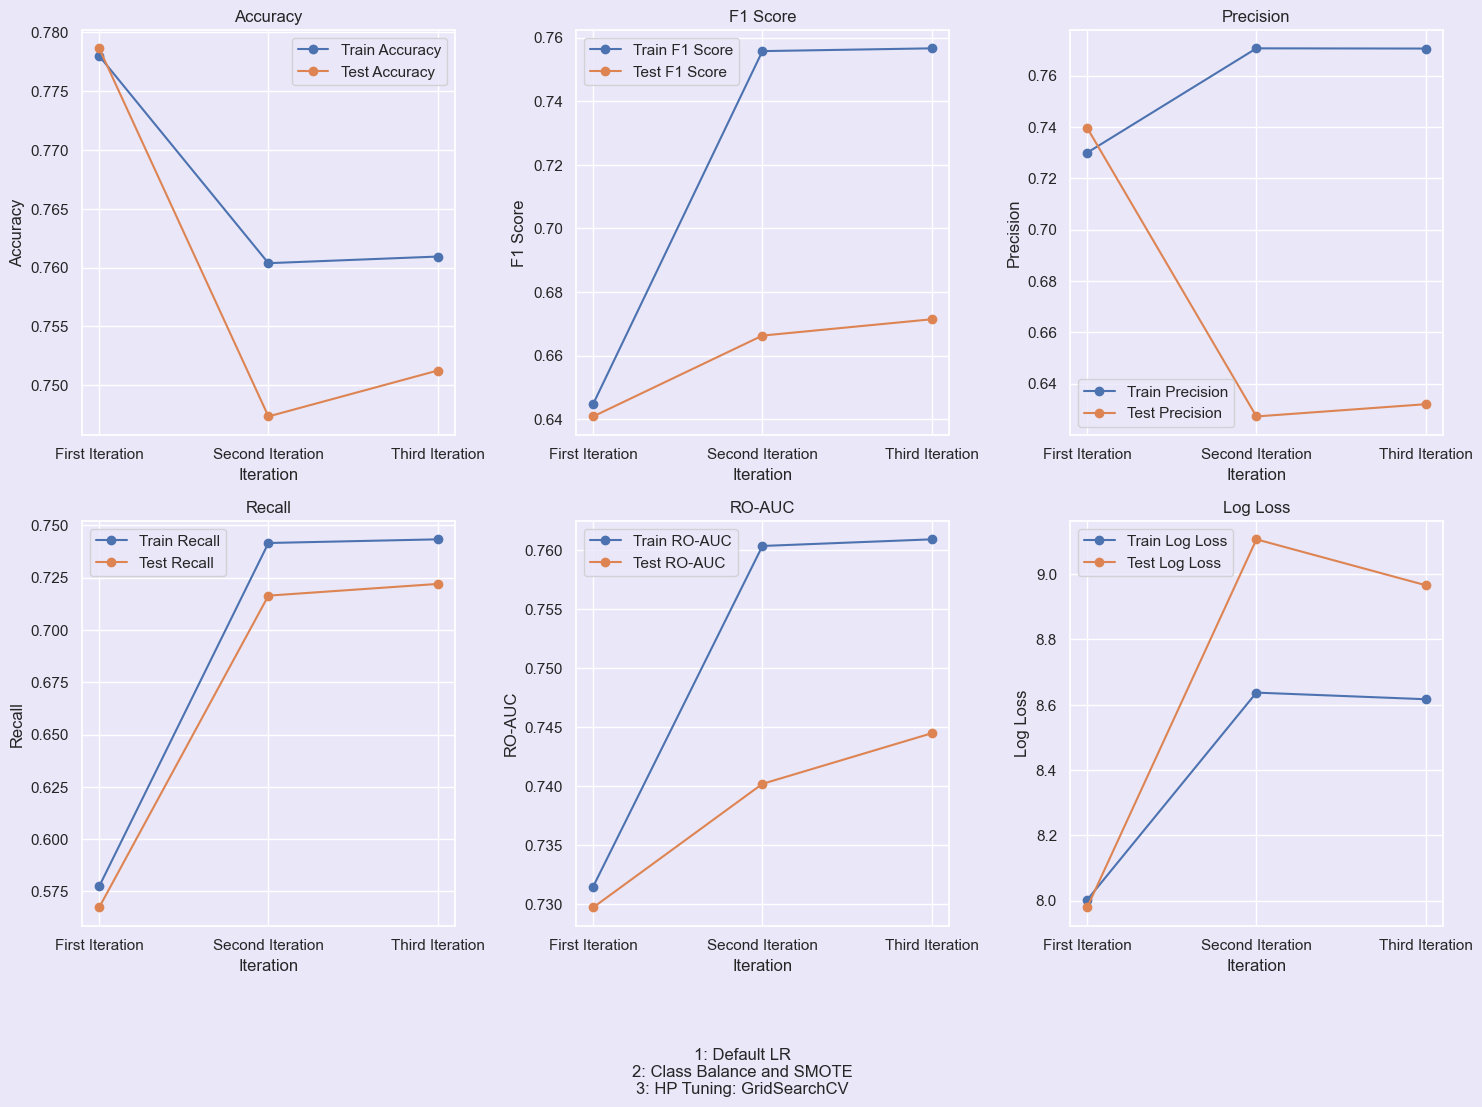

In [52]:
import matplotlib.pyplot as plt

iterations_info = [
    '1: Default LR',
    '2: Class Balance and SMOTE',
    '3: HP Tuning: GridSearchCV'
]

# Define the metrics for each iteration
iterations = ['First Iteration', 'Second Iteration', 'Third Iteration']

train_accuracies = [mean_train_accuracy_pima_lr_iter1, mean_train_accuracy_pima_lr_iter2, mean_train_accuracy_pima_lr_iter3]
test_accuracies = [mean_test_accuracy_pima_lr_iter1, mean_test_accuracy_pima_lr_iter2, mean_test_accuracy_pima_lr_iter3]
train_f1_scores = [mean_train_f1_pima_lr_iter1, mean_train_f1_pima_lr_iter2, mean_train_f1_pima_lr_iter3]
test_f1_scores = [mean_test_f1_pima_lr_iter1, mean_test_f1_pima_lr_iter2, mean_test_f1_pima_lr_iter3]
train_precisions = [mean_train_precision_pima_lr_iter1, mean_train_precision_pima_lr_iter2, mean_train_precision_pima_lr_iter3]
test_precisions = [mean_test_precision_pima_lr_iter1, mean_test_precision_pima_lr_iter2, mean_test_precision_pima_lr_iter3]
train_recalls = [mean_train_recall_pima_lr_iter1, mean_train_recall_pima_lr_iter2, mean_train_recall_pima_lr_iter3]
test_recalls = [mean_test_recall_pima_lr_iter1, mean_test_recall_pima_lr_iter2, mean_test_recall_pima_lr_iter3]
train_rocauc_scores = [mean_train_rocauc_score_pima_lr_iter1, mean_train_rocauc_score_pima_lr_iter2, mean_train_rocauc_score_pima_lr_iter3]
test_rocauc_scores = [mean_test_rocauc_score_pima_lr_iter1, mean_test_rocauc_score_pima_lr_iter2, mean_test_rocauc_score_pima_lr_iter3]
train_log_losses = [mean_train_log_loss_value_pima_lr_iter1, mean_train_log_loss_value_pima_lr_iter2, mean_train_log_loss_value_pima_lr_iter3]
test_log_losses = [mean_test_log_loss_value_pima_lr_iter1, mean_test_log_loss_value_pima_lr_iter2, mean_test_log_loss_value_pima_lr_iter3]

# Plot the metrics
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(iterations, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(iterations, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(iterations, train_f1_scores, marker='o', label='Train F1 Score')
plt.plot(iterations, test_f1_scores, marker='o', label='Test F1 Score')
plt.title('F1 Score')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(iterations, train_precisions, marker='o', label='Train Precision')
plt.plot(iterations, test_precisions, marker='o', label='Test Precision')
plt.title('Precision')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(iterations, train_recalls, marker='o', label='Train Recall')
plt.plot(iterations, test_recalls, marker='o', label='Test Recall')
plt.title('Recall')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(iterations, train_rocauc_scores, marker='o', label='Train RO-AUC')
plt.plot(iterations, test_rocauc_scores, marker='o', label='Test RO-AUC')
plt.title('RO-AUC')
plt.xlabel('Iteration')
plt.ylabel('RO-AUC')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(iterations, train_log_losses, marker='o', label='Train Log Loss')
plt.plot(iterations, test_log_losses, marker='o', label='Test Log Loss')
plt.title('Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.legend()

# Add the iterations information as a guidance label
extra_info = "\n".join(iterations_info)
plt.figtext(0.5, -0.1, extra_info, wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

<b>Training Set Performance Metrics:</b>
Accuracy: 0.7720
F1 Score: 0.6316
Precision: 0.7186
Recall: 0.5634
ROC AUC Score: 0.7231
Log Loss: 8.2184

The training metrics indicate a balanced accuracy with a relatively high precision, suggesting effective identification of negative cases. However, recall is lower, indicating some missed positive cases. The ROC AUC suggests moderate class discrimination.

<b>Test Set Performance Metrics:</b>
Accuracy: 0.7468
F1 Score: 0.6549
Precision: 0.6379
Recall: 0.6727
ROC AUC Score: 0.7303
Log Loss: 9.1279

Test metrics reflect a slight drop in accuracy compared to training, but with improved recall. The F1 score suggests a better balance between precision and recall on unseen data. However, log loss is higher, indicating less confident probability estimates.

<b>Cross-Validation Performance Metrics:</b>
Mean Training Accuracy: 0.7609 ± 0.0087
Mean Test Accuracy: 0.7512 ± 0.0419
Mean Training F1: 0.7566 ± 0.0091
Mean Test F1: 0.6714 ± 0.0380
Mean Training Precision: 0.7705 ± 0.0089
Mean Test Precision: 0.6320 ± 0.0690
Mean Training Recall: 0.7432 ± 0.0106
Mean Test Recall: 0.7219 ± 0.0278
Mean Training ROC AUC: 0.7609 ± 0.0087
Mean Test ROC AUC: 0.7445 ± 0.0316
Mean Training Log Loss: 8.6167 ± 0.3131
Mean Test Log Loss: 8.9659 ± 1.5118

The cross-validation results show consistent performance across folds, with stable accuracy and recall. The variability in precision and log loss suggests opportunities for further refinement and calibration.

<b>Overall Conclusions:</b>

The logistic regression model demonstrates balanced accuracy and recall, indicating its ability to generalize well to unseen data. The disparity between precision and recall highlights a trade-off in capturing false positives versus false negatives. The ROC AUC suggests moderate class discrimination, while the log loss indicates room for probability calibration improvement.

<b>Recommendations for Improvement:</b>

To enhance precision and probability calibration, consider adjusting the decision threshold and exploring additional feature engineering. Techniques like SMOTE or class weight adjustments could further improve class balance and model performance. Fine-tuning hyperparameters using cross-validation could also optimize the model's predictive capabilities.

</div>